<a href="https://colab.research.google.com/github/Jamieren/ML-with-sentinel/blob/main/tryingwithSentinel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# this part is just a sample data set generating code, can be ignore if you using the second part

csv_data = """TimeGenerated,Computer,EventID,EventType,LogonType,AccountName,IpAddress,Status
2024-05-20T12:34:56.789Z,DESKTOP01,4624,Security,2,JohnDoe,192.168.1.100,Success
2024-05-20T13:45:12.345Z,LAPTOP02,4624,Security,2,AliceSmith,10.0.0.5,Success
2024-05-20T14:56:23.678Z,SERVER01,4624,Security,3,BobJohnson,172.16.0.10,Success
2024-05-20T15:07:34.912Z,DESKTOP03,4625,Security,3,EveAnderson,192.168.0.20,Failure
2024-05-20T16:18:45.123Z,DESKTOP04,4624,Security,2,CharlieBrown,192.168.1.50,Success
2024-05-20T17:29:56.234Z,LAPTOP05,4624,Security,2,LucyWilliams,10.0.0.15,Success
2024-05-20T18:40:12.345Z,DESKTOP06,4625,Security,3,DavidLee,192.168.1.30,Failure
2024-05-20T19:51:23.456Z,SERVER02,4624,Security,2,SarahMiller,172.16.0.20,Success
2024-05-20T20:02:34.567Z,DESKTOP07,4624,Security,2,MikeTaylor,192.168.1.70,Success
2024-05-20T21:13:45.678Z,LAPTOP08,4624,Security,2,EmilyBrown,10.0.0.25,Success"""

with open('user_sign_in_activities.csv', 'w') as f:
    f.write(csv_data)


In [1]:
# this part is generating a data set, with 100 rows(data) randomly
# After it finish running, wait about 20 seconds, your folder should have a data set named "user_sign_in_activities_100.csv"
# This is the data set we are using to have fun for the following cade
# However, if you have your own data set, please just skip this part, just don't run it.
# If you run it alread, that's fine too, u just no need to use it...

import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Generate random timestamps within a range
start_date = datetime(2024, 5, 1)
end_date = datetime(2024, 5, 31)
timestamps = [start_date + timedelta(seconds=random.randint(0, int((end_date - start_date).total_seconds()))) for _ in range(100)]

# Generate random computer names
computers = ['DESKTOP01', 'LAPTOP02', 'SERVER01', 'DESKTOP03', 'DESKTOP04', 'LAPTOP05', 'DESKTOP06', 'SERVER02', 'DESKTOP07', 'LAPTOP08']
computer_names = [random.choice(computers) for _ in range(100)]

# Generate random account names
account_names = ['JohnDoe', 'AliceSmith', 'BobJohnson', 'EveAnderson', 'CharlieBrown', 'LucyWilliams', 'DavidLee', 'SarahMiller', 'MikeTaylor', 'EmilyBrown']
account_names = [random.choice(account_names) for _ in range(100)]

# Generate random event types
event_types = ['Security', 'Login', 'Logout', 'Error']
event_types = [random.choice(event_types) for _ in range(100)]

# Generate random success/failure statuses
statuses = ['Success', 'Failure']
statuses = [random.choice(statuses) for _ in range(100)]

# Create DataFrame
data = pd.DataFrame({
    'TimeGenerated': timestamps,
    'Computer': computer_names,
    'EventType': event_types,
    'AccountName': account_names,
    'Status': statuses
})

# Save DataFrame to CSV
data.to_csv('user_sign_in_activities_100.csv', index=False)


In [2]:
# Read the CSV file into a DataFrame
# Now, we are here to read the data

# If you have your data set, and already uploaded into the folder
# If you are not sure how to upload your data set from local, please google the instructions
# Or just try to open 2 windows, and drag the .csv file to the this page
# Normally it takes a while, depends on how big is the file
# Once the dataset is set and ready, please change the file name below to your own file name, including .csv

import pandas as pd
import numpy as np

data = pd.read_csv('user_sign_in_activities_100.csv')

# data = pd.read_csv('your file name here')


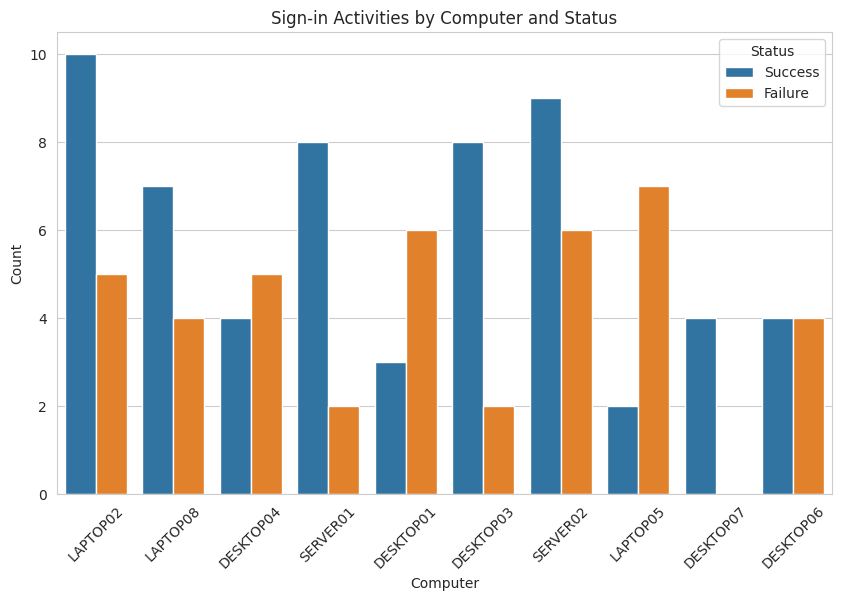

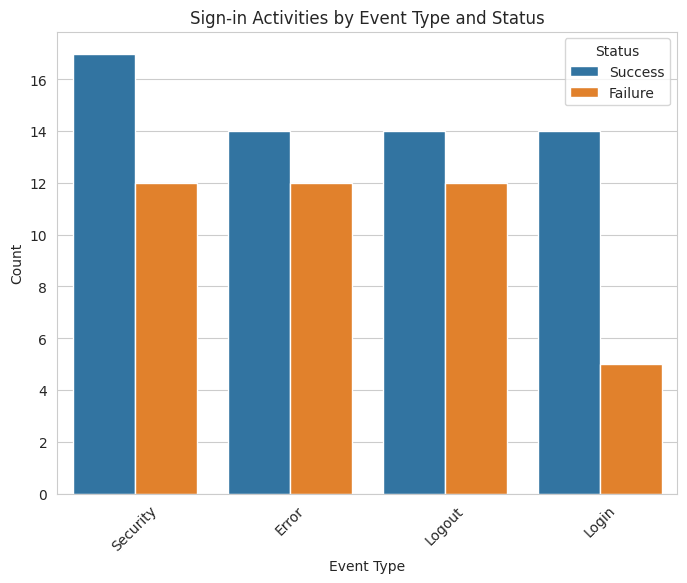

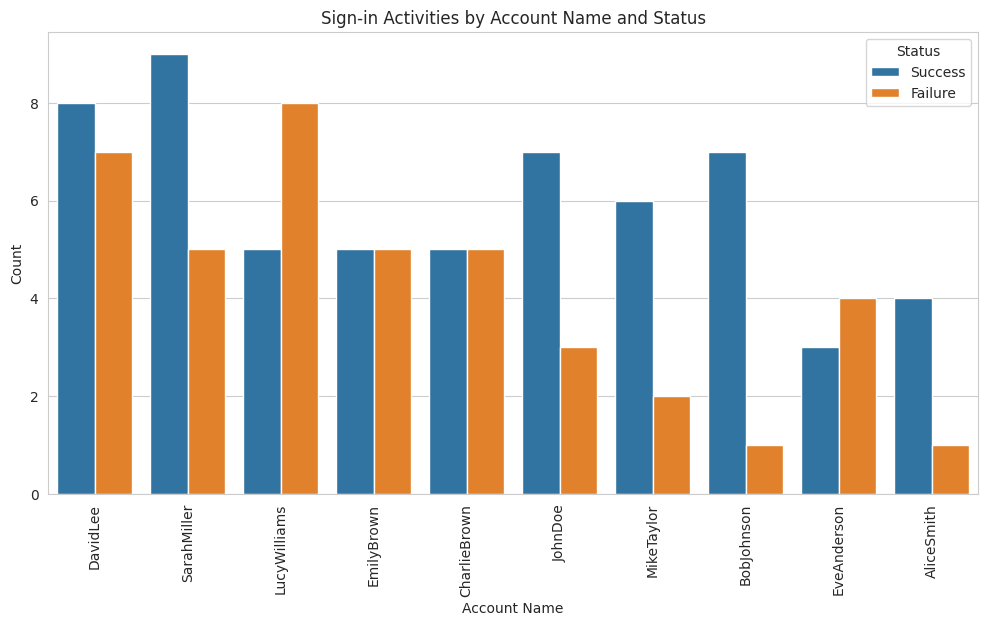

In [8]:
# Here comes to the analyzing side
# to see what associate with the status

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style("whitegrid")

# Bar Plot for Computer vs. Status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Computer', hue='Status')
plt.title('Sign-in Activities by Computer and Status')
plt.xlabel('Computer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

# Bar Plot for EventType vs. Status
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='EventType', hue='Status')
plt.title('Sign-in Activities by Event Type and Status')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

# Bar Plot for AccountName vs. Status
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='AccountName', hue='Status', order=data['AccountName'].value_counts().index)
plt.title('Sign-in Activities by Account Name and Status')
plt.xlabel('Account Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Status')
plt.show()


In [9]:
# trying random forst

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Computer', 'EventType', 'AccountName'], drop_first=True)

# Splitting the dataset into features and target variable
X = data_encoded.drop(columns=['Status'])
y = data_encoded['Status'].apply(lambda x: 1 if x == 'Success' else 0)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the 'TimeGenerated' column to a numeric type
X_train['TimeGenerated'] = pd.to_numeric(X_train['TimeGenerated'])
X_test['TimeGenerated'] = pd.to_numeric(X_test['TimeGenerated'])

# Normalizing the features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Model Training
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_normalized, y_train)

# Model Testing
y_pred_rf = random_forest.predict(X_test_normalized)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Classification Report:")
print(report_rf)

Random Forest Accuracy: 0.5500
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.33      0.31         6
           1       0.69      0.64      0.67        14

    accuracy                           0.55        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.57      0.55      0.56        20



In [ ]:
# Display Predictions
predictions_df = X_test.copy()
predictions_df['TrueStatus'] = y_test
predictions_df['PredictedStatus'] = y_pred_rf
predictions_df['PredictedStatus'] = predictions_df['PredictedStatus'].apply(lambda x: 'Success' if x == 1 else 'Failure')

print(predictions_df.head(10))  # Display the first 10 predictions


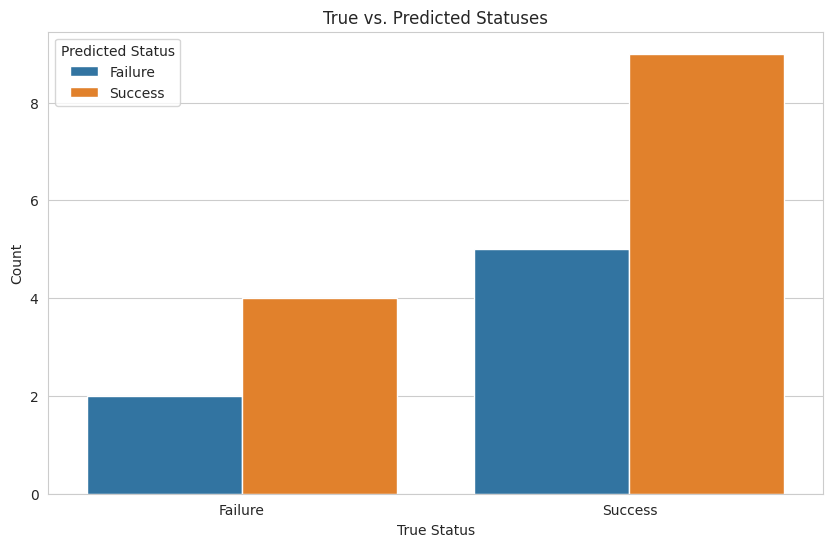

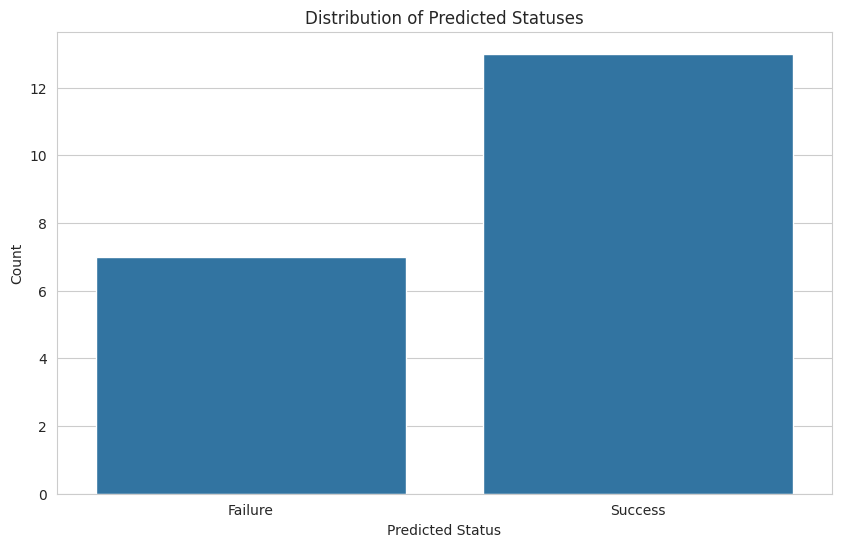

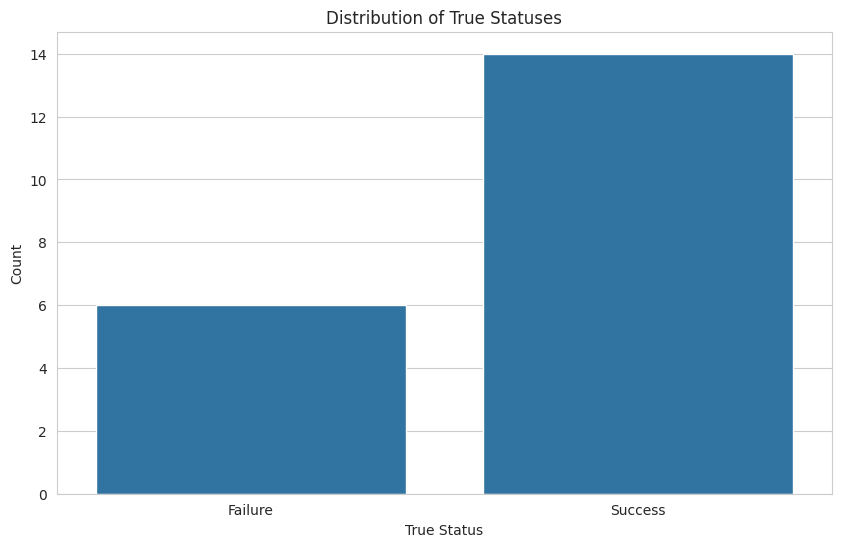

In [11]:
# Save Predictions to CSV
predictions_df = X_test.copy()
predictions_df['TrueStatus'] = y_test
predictions_df['PredictedStatus'] = y_pred_rf
predictions_df['PredictedStatus'] = predictions_df['PredictedStatus'].apply(lambda x: 'Success' if x == 1 else 'Failure')
predictions_df['TrueStatus'] = predictions_df['TrueStatus'].apply(lambda x: 'Success' if x == 1 else 'Failure')

predictions_df.to_csv('predictions.csv', index=False)

# Generate Plots
# Plot for True vs. Predicted Statuses
plt.figure(figsize=(10, 6))
sns.countplot(data=predictions_df, x='TrueStatus', hue='PredictedStatus')
plt.title('True vs. Predicted Statuses')
plt.xlabel('True Status')
plt.ylabel('Count')
plt.legend(title='Predicted Status')
plt.show()

# Distribution of Predictions
plt.figure(figsize=(10, 6))
sns.countplot(data=predictions_df, x='PredictedStatus')
plt.title('Distribution of Predicted Statuses')
plt.xlabel('Predicted Status')
plt.ylabel('Count')
plt.show()

# Distribution of True Statuses
plt.figure(figsize=(10, 6))
sns.countplot(data=predictions_df, x='TrueStatus')
plt.title('Distribution of True Statuses')
plt.xlabel('True Status')
plt.ylabel('Count')
plt.show()